In [1]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn import model_selection
from sklearn import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

# Data Prep

Read in the data

In [3]:
df = pd.read_csv("data/nba_1415.csv")

Using data from the 14-15 and 18-19 seasons, see if players have survived for 5 years

In [4]:
df2 = set(pd.read_csv("data/nba_1819.csv")['Player'])
df1 = df['Player']

# names of repeated players
names = [item for item, count in collections.Counter(df1).items() if count > 1]
# locations of duplicate players
locations = [df.loc[df['Player'] == name] for name in names]

# if player survived 5 years
labels = [1 if player in df2 else 0 for player in df1]
df['Survived'] = labels
df.head()

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,...,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,Survived
0,Russell Westbrook,2014-2015,REG,Thunder,67,34.36,28.15,1.87,5.45,7.31,...,9.36,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,1
1,James Harden,2014-2015,REG,Rockets,81,36.80,27.37,0.93,4.74,5.67,...,7.99,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,1
2,Kevin Durant,2014-2015,REG,Thunder,27,33.80,25.41,0.59,6.00,6.59,...,8.81,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,1
3,LeBron James,2014-2015,REG,Cavaliers,69,36.14,25.26,0.75,5.30,6.06,...,9.04,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,1
4,Anthony Davis,2014-2015,REG,Pelicans,68,36.10,24.35,2.53,7.68,10.21,...,9.44,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,1


Insert other data gathered on how many years in the league the players have been. <TODO> insert methodology

In [5]:
tmp_df = pd.read_csv('data/final_years.csv')
yil = tmp_df['final_yil']
df.insert(24,'yil',yil)
del tmp_df

# Data Exploration

In [6]:
df.head()

,Player,Season,Season Type,Team,Games,Min,Pts,OReb,Dreb,Reb,...,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
0,Russell Westbrook,2014-2015,REG,Thunder,67,34.36,28.15,1.87,5.45,7.31,...,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,7,1
1,James Harden,2014-2015,REG,Rockets,81,36.80,27.37,0.93,4.74,5.67,...,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,6,1
2,Kevin Durant,2014-2015,REG,Thunder,27,33.80,25.41,0.59,6.00,6.59,...,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,8,1
3,LeBron James,2014-2015,REG,Cavaliers,69,36.14,25.26,0.75,5.30,6.06,...,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,12,1
4,Anthony Davis,2014-2015,REG,Pelicans,68,36.10,24.35,2.53,7.68,10.21,...,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,3,1


Remove the features that are not needed

In [7]:
df = df.drop(columns=['Season', 'Season Type', 'Team', 'Player'])
df.head()

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,...,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
0,67,34.36,28.15,1.87,5.45,7.31,8.58,2.09,0.21,4.39,...,21.96,0.426,1.28,4.30,0.299,8.15,9.76,0.835,7,1
1,81,36.80,27.37,0.93,4.74,5.67,6.98,1.90,0.74,3.96,...,18.15,0.440,2.57,6.85,0.375,8.83,10.17,0.868,6,1
2,27,33.80,25.41,0.59,6.00,6.59,4.07,0.89,0.93,2.74,...,17.30,0.510,2.37,5.89,0.403,5.41,6.33,0.854,8,1
3,69,36.14,25.26,0.75,5.30,6.06,7.39,1.58,0.71,3.94,...,18.55,0.488,1.74,4.93,0.353,5.43,7.65,0.710,12,1
4,68,36.10,24.35,2.53,7.68,10.21,2.19,1.47,2.94,1.40,...,17.63,0.535,0.01,0.18,0.083,5.46,6.78,0.805,3,1


In [8]:
def feature_visualization(name, values):
    print(f'Visualizing features for {name}')
    plt.boxplot(values)
    plt.show()

Visualizing features for Games


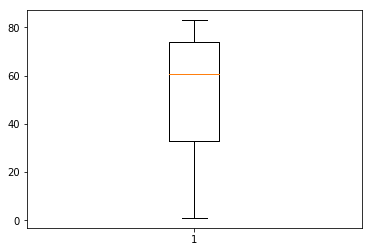

Visualizing features for Min


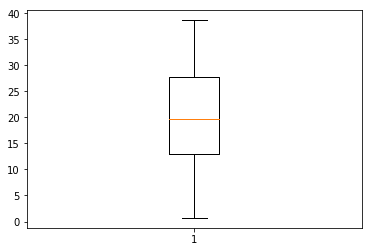

Visualizing features for Pts


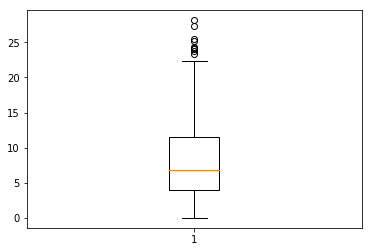

Visualizing features for OReb


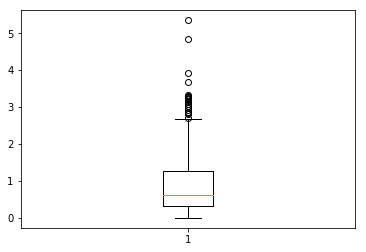

Visualizing features for Dreb


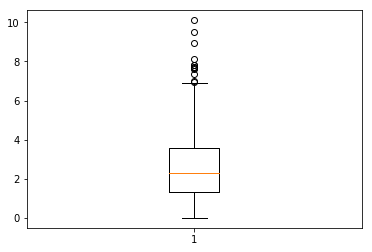

Visualizing features for Reb


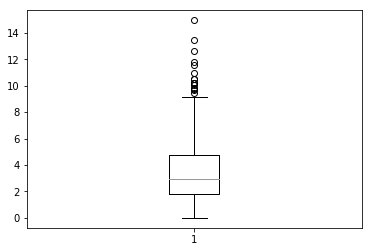

Visualizing features for Ast


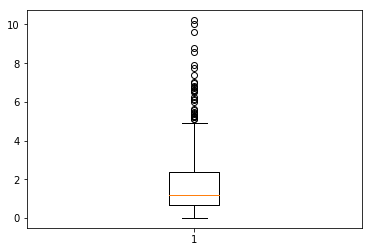

Visualizing features for Stl


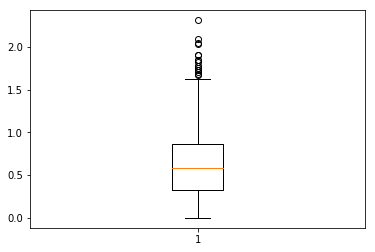

Visualizing features for Blk


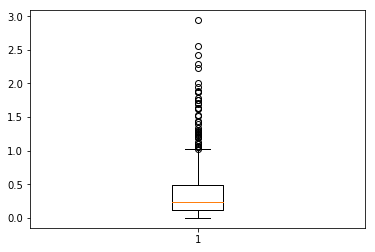

Visualizing features for TO


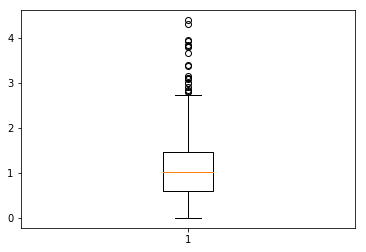

Visualizing features for PF


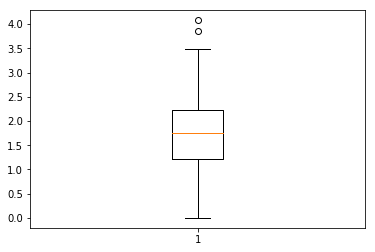

Visualizing features for FGM


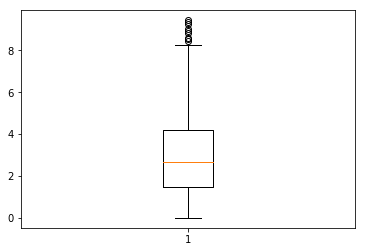

Visualizing features for FGA


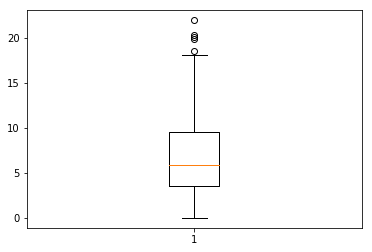

Visualizing features for FG%


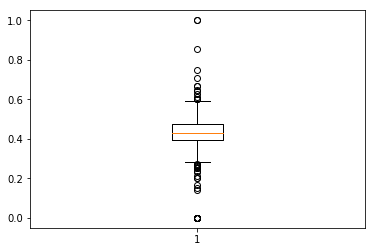

Visualizing features for 3PTM


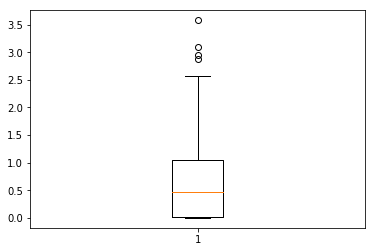

Visualizing features for 3PTA


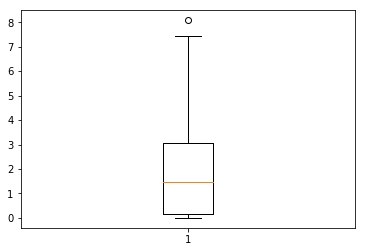

Visualizing features for 3PT%


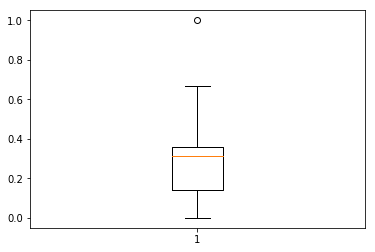

Visualizing features for FTM


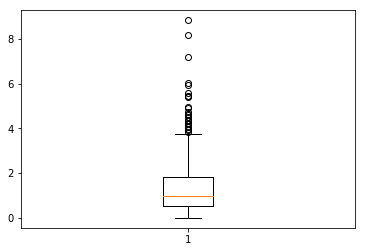

Visualizing features for FTA


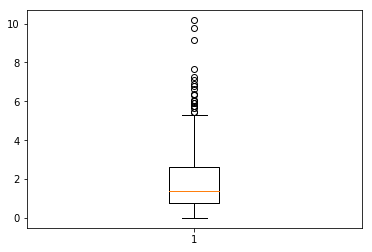

Visualizing features for FT%


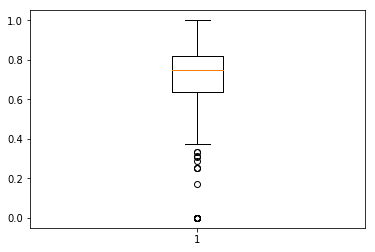

Visualizing features for yil


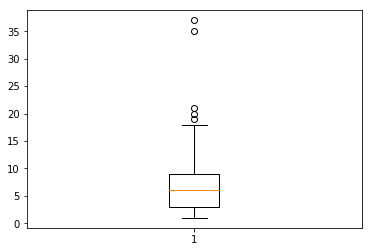

In [9]:
feature_names = df.columns.values[:-1]
for feature_name in feature_names:
    feature_visualization(feature_name, df[feature_name])

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FGA,FG%,3PTM,3PTA,3PT%,FTM,FTA,FT%,yil,Survived
Games,1,0.66,0.54,0.36,0.53,0.5,0.34,0.42,0.31,0.42,0.57,0.55,0.52,0.36,0.32,0.29,0.24,0.39,0.39,0.38,0.18,0.39
Min,0.66,1,0.89,0.41,0.72,0.66,0.65,0.75,0.36,0.79,0.7,0.9,0.9,0.26,0.53,0.53,0.35,0.73,0.74,0.36,0.17,0.46
Pts,0.54,0.89,1,0.35,0.67,0.6,0.64,0.69,0.32,0.81,0.57,0.99,0.98,0.26,0.55,0.54,0.35,0.89,0.87,0.38,0.15,0.43
OReb,0.36,0.41,0.35,1,0.79,0.9,-0.043,0.16,0.72,0.27,0.6,0.42,0.3,0.45,-0.3,-0.32,-0.31,0.34,0.44,-0.015,0.014,0.22
Dreb,0.53,0.72,0.67,0.79,1,0.98,0.29,0.45,0.68,0.56,0.71,0.71,0.63,0.4,0.065,0.047,-0.0002,0.59,0.65,0.15,0.16,0.37
Reb,0.5,0.66,0.6,0.9,0.98,1,0.19,0.37,0.73,0.49,0.71,0.65,0.55,0.43,-0.055,-0.075,-0.1,0.53,0.61,0.1,0.12,0.34
Ast,0.34,0.65,0.64,-0.043,0.29,0.19,1,0.7,-0.038,0.82,0.34,0.62,0.67,0.018,0.45,0.48,0.32,0.59,0.55,0.26,0.13,0.28
Stl,0.42,0.75,0.69,0.16,0.45,0.37,0.7,1,0.15,0.72,0.51,0.67,0.7,0.092,0.47,0.5,0.32,0.6,0.6,0.25,0.043,0.38
Blk,0.31,0.36,0.32,0.72,0.68,0.73,-0.038,0.15,1,0.21,0.51,0.37,0.26,0.42,-0.2,-0.22,-0.23,0.29,0.37,-0.021,0.02,0.24
TO,0.42,0.79,0.81,0.27,0.56,0.49,0.82,0.72,0.21,1,0.58,0.8,0.82,0.16,0.39,0.41,0.26,0.77,0.77,0.27,0.11,0.36


In [11]:
df = df.drop(columns=['FGA', '3PTA', 'FTA'])

Mention the highly correlated features and talk about removing them

# Feature Engineering

Care about how the points were made.

In [12]:
df['3P/T'] = 3*df['3PTM']/(df['Pts'] + 0.00001)
df['FT/T'] = 2*df['FTM']/(df['Pts'] + 0.00001)
df['FG/T'] = 1*df['FGM']/(df['Pts'] + 0.00001)
df['TOP/M'] = (df['TO']+df['PF'])/(df['Min'] + 0.00001)
# Stats that correspond to offensive ability
d_stats = df['Blk'] + df['Stl']
d_stats -= (d_stats.min() - 0.000001)
d_stats /= d_stats.max()
# Stats that correspond to offensive ability
o_stats = df['FGM'] + df['OReb'] + df['Ast']
o_stats -= (o_stats.min() - 0.000001)
o_stats /= o_stats.max()
# Stats that correspond to shooting ability
s_stats = df['3PTM'] + df['FTM']
s_stats -= (s_stats.min() - 0.000001)
s_stats /= s_stats.max()
# Tells how well rounded a player is
from scipy.stats import hmean
df['SPE'] = hmean(pd.DataFrame(np.array([d_stats,o_stats,s_stats]).reshape(-1,3)), axis=1)
# Put Survived at the end
df = df[[c for c in df if c != 'Survived'] + ['Survived']]
print(df.shape)
df.head()

(496, 24)


,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,...,3PT%,FTM,FT%,yil,3P/T,FT/T,FG/T,TOP/M,SPE,Survived
0,67,34.36,28.15,1.87,5.45,7.31,8.58,2.09,0.21,4.39,...,0.299,8.15,0.835,7,0.136412,0.579041,0.332504,0.207800,0.499092,1
1,81,36.80,27.37,0.93,4.74,5.67,6.98,1.90,0.74,3.96,...,0.375,8.83,0.868,6,0.281695,0.645232,0.291925,0.177446,0.499195,1
2,27,33.80,25.41,0.59,6.00,6.59,4.07,0.89,0.93,2.74,...,0.403,5.41,0.854,8,0.279811,0.425816,0.346714,0.124852,0.500150,1
3,69,36.14,25.26,0.75,5.30,6.06,7.39,1.58,0.71,3.94,...,0.353,5.43,0.710,12,0.206651,0.429929,0.357878,0.163254,0.359373,1
4,68,36.10,24.35,2.53,7.68,10.21,2.19,1.47,2.94,1.40,...,0.083,5.46,0.805,3,0.001232,0.448460,0.387680,0.096122,0.367996,1


##### Correlation Matrix of Full Dataset

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,TO,PF,FGM,FG%,3PTM,3PT%,FTM,FT%,yil,3P/T,FT/T,FG/T,TOP/M,SPE,Survived
Games,1,0.66,0.54,0.36,0.53,0.5,0.34,0.42,0.31,0.42,0.57,0.55,0.36,0.32,0.24,0.39,0.38,0.18,0.037,-0.047,0.23,-0.26,0.33,0.39
Min,0.66,1,0.89,0.41,0.72,0.66,0.65,0.75,0.36,0.79,0.7,0.9,0.26,0.53,0.35,0.73,0.36,0.17,0.043,0.014,0.15,-0.32,0.38,0.46
Pts,0.54,0.89,1,0.35,0.67,0.6,0.64,0.69,0.32,0.81,0.57,0.99,0.26,0.55,0.35,0.89,0.38,0.15,-0.0046,0.093,0.084,-0.23,0.36,0.43
OReb,0.36,0.41,0.35,1,0.79,0.9,-0.043,0.16,0.72,0.27,0.6,0.42,0.45,-0.3,-0.31,0.34,-0.015,0.014,-0.51,0.12,0.27,0.034,0.11,0.22
Dreb,0.53,0.72,0.67,0.79,1,0.98,0.29,0.45,0.68,0.56,0.71,0.71,0.4,0.065,-0.0002,0.59,0.15,0.16,-0.29,0.068,0.23,-0.098,0.26,0.37
Reb,0.5,0.66,0.6,0.9,0.98,1,0.19,0.37,0.73,0.49,0.71,0.65,0.43,-0.055,-0.1,0.53,0.1,0.12,-0.38,0.088,0.25,-0.058,0.23,0.34
Ast,0.34,0.65,0.64,-0.043,0.29,0.19,1,0.7,-0.038,0.82,0.34,0.62,0.018,0.45,0.32,0.59,0.26,0.13,0.082,0.042,0.015,-0.098,0.32,0.28
Stl,0.42,0.75,0.69,0.16,0.45,0.37,0.7,1,0.15,0.72,0.51,0.67,0.092,0.47,0.32,0.6,0.25,0.043,0.08,0.055,0.038,-0.17,0.28,0.38
Blk,0.31,0.36,0.32,0.72,0.68,0.73,-0.038,0.15,1,0.21,0.51,0.37,0.42,-0.2,-0.23,0.29,-0.021,0.02,-0.36,0.056,0.24,0.0077,0.087,0.24
TO,0.42,0.79,0.81,0.27,0.56,0.49,0.82,0.72,0.21,1,0.58,0.8,0.16,0.39,0.26,0.77,0.27,0.11,-0.056,0.08,0.1,0.04,0.33,0.36


#### Correlation Matrix of Reduced Dataset

Here we create a new dataset attempting to again tring to reduce cross feature correlation.

In [33]:
df_red = df.drop(columns=['Games', 'Pts', 'FGM', 'FTM', 'TO', 'Stl', 'OReb', 'Dreb', 'Reb', '3PTM', '3PT%'])

corr = df_red.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Min,Ast,Blk,PF,FG%,FT%,yil,3P/T,FT/T,FG/T,TOP/M,SPE,Survived
Min,1,0.65,0.36,0.7,0.26,0.36,0.17,0.043,0.014,0.15,-0.32,0.38,0.46
Ast,0.65,1,-0.038,0.34,0.018,0.26,0.13,0.082,0.042,0.015,-0.098,0.32,0.28
Blk,0.36,-0.038,1,0.51,0.42,-0.021,0.02,-0.36,0.056,0.24,0.0077,0.087,0.24
PF,0.7,0.34,0.51,1,0.33,0.19,0.074,-0.13,-0.022,0.27,0.16,0.25,0.34
FG%,0.26,0.018,0.42,0.33,1,0.21,0.07,-0.25,-0.083,0.62,0.071,0.19,0.15
FT%,0.36,0.26,-0.021,0.19,0.21,1,0.14,0.14,0.28,0.068,-0.22,0.24,0.12
yil,0.17,0.13,0.02,0.074,0.07,0.14,1,0.038,-0.032,0.068,-0.14,0.11,-0.22
3P/T,0.043,0.082,-0.36,-0.13,-0.25,0.14,0.038,1,-0.35,-0.15,-0.19,0.11,0.0073
FT/T,0.014,0.042,0.056,-0.022,-0.083,0.28,-0.032,-0.35,1,-0.44,-0.074,-0.046,-0.045
FG/T,0.15,0.015,0.24,0.27,0.62,0.068,0.068,-0.15,-0.44,1,0.11,0.13,0.04


#### Correlation Matrix of Survived High Correlation Dataset

Here we create a new dataset attempting to keep all features with high correlation to the survived label.
We attempt to get around features with high correlation by dividing these features by each other.

In [35]:
df_cor = df.drop(columns=['FG%', '3PT%', 'FT%', 'TO', 'PF', 'FG/T', 'FT/T', '3P/T'])
df_cor['Pts'] = df['Pts']/(df['Min'] + 0.000001)
df_cor['FGM'] = df['FGM']/(df['Min'] + 0.000001)
df_cor['FTM'] = df['FTM']/(df['Min'] + 0.000001)
df_cor['3PTM'] = df['3PTM']/(df['Min'] + 0.000001)
df_cor['FTM'] = df['FTM']/(df['Min'] + 0.000001)
df_cor['OReb'] = df['OReb']/(df['Min'] + 0.000001)
df_cor['Dreb'] = df['Dreb']/(df['Min'] + 0.000001)
df_cor['Stl'] = df['Stl']/(df['Stl'] + 0.000001)
df_cor['Ast'] = df['Ast']/(df['Ast'] + 0.000001)
df_cor['Reb'] = df['Reb']/(df['OReb'] + 0.000001)

# Put Survived at the end
df_cor = df_cor[[c for c in df_cor if c != 'Survived'] + ['Survived']]

corr = df_cor.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Games,Min,Pts,OReb,Dreb,Reb,Ast,Stl,Blk,FGM,3PTM,FTM,yil,TOP/M,SPE,Survived
Games,1,0.66,0.34,-0.0043,0.077,-0.28,0.27,0.37,0.31,0.34,0.12,0.15,0.18,-0.26,0.33,0.39
Min,0.66,1,0.52,-0.12,0.0058,-0.21,0.23,0.32,0.36,0.48,0.19,0.33,0.17,-0.32,0.38,0.46
Pts,0.34,0.52,1,-0.11,0.092,-0.18,0.14,0.14,0.2,0.94,0.3,0.61,0.063,-0.05,0.28,0.27
OReb,-0.0043,-0.12,-0.11,1,0.62,-0.17,-0.056,-0.017,0.45,-0.016,-0.58,0.057,-0.095,0.33,-0.1,-0.064
Dreb,0.077,0.0058,0.092,0.62,1,0.051,-0.15,-0.036,0.46,0.22,-0.4,0.0097,0.021,0.32,-0.026,0.07
Reb,-0.28,-0.21,-0.18,-0.17,0.051,1,-0.18,-0.39,-0.12,-0.15,-0.026,-0.19,-0.062,0.11,-0.14,-0.042
Ast,0.27,0.23,0.14,-0.056,-0.15,-0.18,1,0.46,0.11,0.086,0.1,0.17,0.1,-0.3,0.17,-0.023
Stl,0.37,0.32,0.14,-0.017,-0.036,-0.39,0.46,1,0.15,0.14,0.034,0.071,0.12,-0.13,0.2,0.075
Blk,0.31,0.36,0.2,0.45,0.46,-0.12,0.11,0.15,1,0.27,-0.32,0.16,0.02,0.0077,0.087,0.24
FGM,0.34,0.48,0.94,-0.016,0.22,-0.15,0.086,0.14,0.27,1,0.15,0.39,0.065,0.015,0.26,0.26


# Algorithm Analysis
knn, SVM, RF+XGB, naive bayes, maybe neural net

In [36]:
scaler = sk.preprocessing.StandardScaler()
# Separating Features and Labels
x_full = df[df.columns[0:-1]]
y_full = df[df.columns[-1]]
x_red = df_red[df.columns[0:-1]]
y_red = df_red[df.columns[-1]]
x_cor = df_cor[df.columns[0:-1]]
y_cor = df_cor[df.columns[-1]]
print(f'Features shape: {x_full.shape}')
print(f'Labels shape: {y_full.shape}')
# Creating Training and Testing sets
x_full_train, x_full_test, y_full_train, y_full_test = model_selection.train_test_split(x, y)
x_red_train, x_red_test, y_red_train, y_red_test = model_selection.train_test_split(x, y)
x_cor_train, x_cor_test, y_cor_train, y_cor_test = model_selection.train_test_split(x, y)
print(f'Training Features shape: {x_train.shape}')
print(f'Training Labels shape: {y_train.shape}')
print(f'Testing Features shape: {x_test.shape}')
print(f'Testing Labels shape: {y_test.shape}')

KeyError: "['3PT%', 'Reb', 'FGM', 'TO', 'Pts', 'Stl', '3PTM', 'OReb', 'Games', 'FTM', 'Dreb'] not in index"

### SVM Performance Analysis
Below we evaluate the performance of a SVM on our Dataset.

Notes:
- Mixed Results from smaller feature set.

In [ ]:
from sklearn.svm import SVC
# Best Dataset for this algorithm
x, y, x_train, y_train, x_test, y_test = x_full, y_full, x_full_train, y_full_train, x_full_test, y_full_test


param_grid = {'svm__kernel': ['linear', 'rbf', 'poly']}

svm_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('svm', svm.SVC())])
svm_gs = model_selection.GridSearchCV(svm_pipeline, param_grid, scoring="accuracy", cv=5)
svm_cv_results = model_selection.cross_val_score(svm_gs, x, y=y, cv=5)

svm_gs.fit(x, y)
best_svm = svm_gs.best_estimator_

# Cross Validation Analysis
print("Overall accuracy:     {:3.1f}%".format(svm_cv_results.mean() * 100))
print("Best SVM accuracy:    {:3.1f}%".format(svm_gs.best_score_ * 100))
print("Best SVM parameters:  {}".format(svm_gs.best_params_))

# Confusion Matrix and Classification Report
svm_p = model_selection.cross_val_predict(best_svm, x, y=y, cv=10)
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(svm_p, y))
print("\nClassification Report: ")
print(metrics.classification_report(svm_p, y))

### KNN Performance Analysis
Below we evaluate the performance of a KNN on our Dataset.

Notes:
 - Improves with smaller feature size

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Best Dataset for this algorithm
x, y, x_train, y_train, x_test, y_test = x_full, y_full, x_full_train, y_full_train, x_full_test, y_full_test


param_grid = {'knn__n_neighbors': list(range(3,20,3))}

knn_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('knn', KNeighborsClassifier())])
knn_gs = model_selection.GridSearchCV(knn_pipeline, param_grid, scoring="accuracy",cv=5)
knn_cv_results = model_selection.cross_val_score(knn_gs, x, y=y, cv=5)

knn_gs.fit(x, y)
best_knn = knn_gs.best_estimator_

# Cross Validation Analysis
print("Overall accuracy:     {:3.1f}%".format(knn_cv_results.mean() * 100))
print("Best KNN accuracy:    {:3.1f}%".format(knn_gs.best_score_ * 100))
print("Best KNN parameters:  {}".format(knn_gs.best_params_))

# Confusion Matrix and Classification Report
knn_p = model_selection.cross_val_predict(best_knn, x, y=y, cv=10)
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(knn_p, y))
print("\nClassification Report: ")
print(metrics.classification_report(knn_p, y))

### Random Forest Performance Analysis
Below we evaluate the performance of a Random Forest on our Dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Best Dataset for this algorithm
x, y, x_train, y_train, x_test, y_test = x_full, y_full, x_full_train, y_full_train, x_full_test, y_full_test


param_grid = {
    'rf__max_depth': list(range(3,30,2)),
    'rf__min_samples_leaf': list(range(8,32,4)),
    'rf__max_features': ['sqrt', 'log2']
}

rf_pipeline = sk.pipeline.Pipeline(memory=None, steps=[('scaler', scaler), ('rf', RandomForestClassifier())])
rf_gs = model_selection.GridSearchCV(rf_pipeline, param_grid, scoring="accuracy",cv=5)
rf_cv_results = model_selection.cross_val_score(rf_gs, x, y=y, cv=5)

rf_gs.fit(x, y)
best_rf = rf_gs.best_estimator_

# Cross Validation Analysis
print("Overall accuracy:               {:3.1f}%".format(rf_cv_results.mean() * 100))
print("Best Random Forest accuracy:    {:3.1f}%".format(rf_gs.best_score_ * 100))
print("Best Random Forest parameters:  {}".format(rf_gs.best_params_))

# Confusion Matrix and Classification Report
rf_p = model_selection.cross_val_predict(best_rf, x, y=y, cv=10)
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(rf_p, y))
print("\nClassification Report: ")
print(metrics.classification_report(rf_p, y))

### Naïve Bayes Performance Analysis

Notes:
- Slightly hampered by smaller feature set

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Best Dataset for this algorithm
x, y, x_train, y_train, x_test, y_test = x_full, y_full, x_full_train, y_full_train, x_full_test, y_full_test


nb = GaussianNB()
nb_results = model_selection.cross_val_score(nb, x, y=y, cv=10)

# Cross Validation Analysis
print("Overall Naive Bayes accuracy:     {:3.1f}%".format(nb_results.mean() * 100))

# Confusion Matrix and Classification Report
nb_p = model_selection.cross_val_predict(nb, x, y=y, cv=10)
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(nb_p, y))
print("\nClassification Report: ")
print(metrics.classification_report(nb_p, y))

# Data Analysis

# Outcome 